In [1]:
"""
Created on 2018/09/01
Revised on 2018/10/29

@author: STEVEN.CY.CHUANG
"""

import numpy as np
from keras.datasets import mnist

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1' 
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.visualization import *
from util import import_notebook
from module.autoencoder import *

Using TensorFlow backend.


importing Jupyter notebook from ../module/autoencoder.ipynb


# Example of VAE

(60000, 784)
(10000, 784)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           12560       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 16)           64          dense_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 16)           0           batch_normalization_1[0][0]      
___________________________________________________________________________________

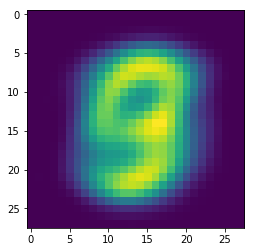

In [2]:
# Load dataset
(x_train, y_train), (x_valid, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_valid = x_valid.astype('float32') / 255.
num_train = len(x_train)
num_test = len(x_valid)
size_digit = x_train.shape[1:]
dim_input = np.prod(x_train.shape[1:]) # dim_input is width*height
x_train = x_train.reshape((num_train, dim_input))
x_valid = x_valid.reshape((num_test, dim_input))
print(x_train.shape)
print(x_valid.shape)

# Set parameters
num_epochs = 10
size_batch = 512
dim_latent = 4
lay_den_enc = [16, 8]
rat_recon = 1
name_optim = "adam"
path_temp_best = "../model/temp/"
path_model = '../model/example/VAE'
patience = 3

# Initialize and train
vae = VAE(dim_input, dim_latent, lay_den_enc=lay_den_enc, rat_recon=rat_recon)

history, time_train = vae.fit(x_train, x_valid, 
                              num_epochs=num_epochs,
                              size_batch=size_batch,
                              path_temp_best=path_temp_best,
                              verb=0
                             )

# Get the encoder and decoder from the trained model directly
encoder = vae.encoder
decoder = vae.decoder
autoencoder = vae.autoencoder
encoder.summary()
decoder.summary()
autoencoder.summary()

# Save the trained model and load from the path to resume as encoder, decoder, and autoencoder
vae.save(path_model)
encoder, decoder, autoencoder = load(path_model)
encoder.summary()
decoder.summary()
autoencoder.summary()

# Encode testing dataset and get generated reconstruction
encode = encoder.predict(x_valid)
generate = decoder.predict(np.array([[0, 0, 0, 0]]))
plt.imshow(generate.reshape(size_digit))

# Example of Convolutional VAE

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 90.7560 - val_loss: 0.8163

Epoch 00001: val_loss improved from inf to 0.81626, saving model to ../model/temp/AutoEncoder1540866179.9605734.hdf5
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 7.3586 - val_loss: 0.5954

Epoch 00002: val_loss improved from 0.81626 to 0.59538, saving model to ../model/temp/AutoEncoder1540866179.9605734.hdf5
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 4.9448 - val_loss: 0.5372

Epoch 00003: val_loss improved from 0.59538 to 0.53717, saving model to ../model/temp/AutoEncoder1540866179.9605734.hdf5
Epoch 4/10
60000/60000 [==============================] - 4s 60us/step - loss: 4.1238 - val_loss: 0.5010

Epoch 00004: val_loss improved from 0.53717 to 0.50104, saving model to ../model/temp/AutoEncoder1540866179.9605734.hdf5
Epoch 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 4)    68          input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 14, 14, 4)    16          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_5 (LeakyReLU)       (None, 14, 14, 4)    0           batch_normalization_5[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

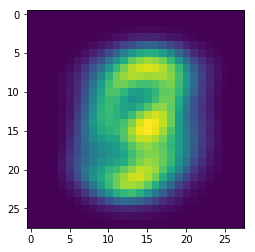

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
num_train = len(x_train)
num_test = len(x_test)
size_digit = x_train.shape[1:]
dim_input = [*size_digit, 1] # dim_input is (width, height, channels)
x_train = x_train.reshape((num_train, *dim_input))
x_test = x_test.reshape((num_test, *dim_input))
print(x_train.shape)
print(x_test.shape)

# Set parameters
num_epochs = 10
size_batch = 512
size_kernel = 4
lay_conv_enc = [4, 16]
lay_den_enc = [8]
rat_recon = 0.9
name_optim = 'adam'
path_temp_best = '../model/temp'
path_model = '../model/example/ConvVAE'
patience = 3

# Initialize and train
convVAE = ConvVAE(dim_input, size_kernel=size_kernel, lay_conv_enc=lay_conv_enc, lay_den_enc=lay_den_enc, rat_recon=rat_recon)
history, timeTrain = convVAE.fit(x_train, x_test, 
                                 num_epochs=num_epochs,
                                 size_batch=size_batch,
                                 path_temp_best=path_temp_best)

# Get the encoder and decoder from the trained model directly
encoder = convVAE.encoder
decoder = convVAE.decoder
autoencoder = convVAE.autoencoder
encoder.summary()
decoder.summary()
autoencoder.summary()

# Save the trained model and load from the path to resume as encoder, decoder, and autoencoder
convVAE.save(path_model)
encoder, decoder, autoencoder = load(path_model)
encoder.summary()
decoder.summary()
autoencoder.summary()

# Encode testing dataset and get generated reconstruction
encode = encoder.predict(x_test)
generate = decoder.predict(np.array([[0, 0]]))
plt.imshow(generate.reshape(size_digit))